# "1 Rule" Prediction

## If you had to choose just one feature?

Given the following data set:

In [2]:
# Reading in data using pandas
import pandas as pd
data = pd.read_csv("play_data.csv")
# displaying the data
data

,Day,Outlook,Humidity,Wind,Play
0,D1,Sunny,High,Weak,No
1,D2,Sunny,High,Strong,No
2,D3,Overcast,High,Weak,Yes
3,D4,Rain,High,Weak,Yes
4,D5,Rain,Normal,Weak,Yes
5,D6,Rain,Normal,Strong,No
6,D7,Overcast,Normal,Strong,Yes
7,D8,Sunny,High,Weak,No
8,D9,Sunny,Normal,Weak,Yes
9,D10,Rain,Normal,Weak,Yes


How do you choose just 1 feature (Outlook, Humidy or Wind) that best predicts whether to play or not?

## If you didn't have any features?

Prediction is clear if we can't use any features at all. Based purely on the output play 9/14 "yes" and 5/14 "no" we could do no better than to always predict "yes". Clearly, if the results were the other way around 5/14 "yes" and 9/14 "no", then we would predict "no" with equal confidence.

An equal split, 7/14 "yes" and 7/14 "no" would be the worst possible case, it could be thought of as the most "disordered".

Similarly, if all were "yes" or all were "no", then there would be no "disorder".

It would be useful if there was a mathematical function to determine the degree of "disorder" irrespective of the number of outputs that are being predicted.

## Information Entropy

The following function has this property. It is 1 when proportion p(+) = p(-) = 0.5 and 0 when proportion p(+) = 0 or 1. So 1 for maximum disorder and 0 for no disorder.

$$H(S) = -p(+) \times \log_{2}p(+)-p(-) \times \log_{2}p(-)$$

To clarify notation, S is a set containing proportion p(+) positives and p(-) negatives. So for the "output set" play, in the data above, we have p(+) = 9/14 and p(-) = 5/14. Note, p(+) = 1 - p(-). 

A plot for p(+) between 0 and 1 confirms the function has the desired shape. Note there is "computational glitch" for p(+) = 0 or p(+) = 1, I'll won't go into the explanation of this as it doesn't really help illustrate any of the ideas.

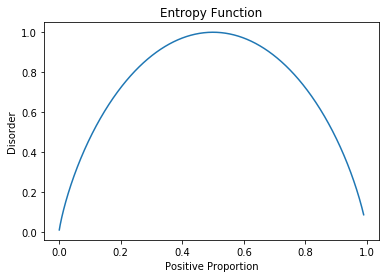

In [3]:
# importing matplotlib
import matplotlib.pyplot as plt
import numpy as np

# defining the entropy function
def HS(pp):
    pn = 1-pp
    return -pp*np.log2(pp) - pn*np.log2(pn)

# setting up a probabily variable
p_plus = np.arange(0.001,0.990,0.001)
HS_p_plus = HS(p_plus)
HS_p_plus

# plotting the entropy
plt.plot(p_plus,HS_p_plus)
plt.ylabel('Disorder')
plt.xlabel('Positive Proportion')
plt.title('Entropy Function')
plt.show()

There are plenty of other functions with a similar shape in this range. For example:

$$H(S) = 4 p(+) (p(-))$$

Again this is easily verfied by a plot.

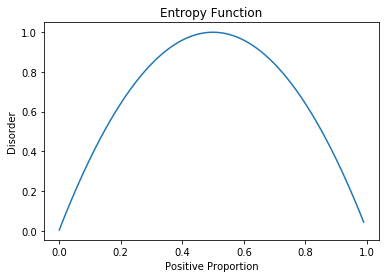

In [4]:
# importing matplotlib
import matplotlib.pyplot as plt
import numpy as np

# defining the entropy function
def HS(pp):
    pn = 1-pp
    return 4*pp*pn

# setting up a probabily variable
p_plus = np.arange(0.001,0.990,0.001)
HS_p_plus = HS(p_plus)
HS_p_plus

# plotting the entropy
plt.plot(p_plus,HS_p_plus)
plt.ylabel('Disorder')
plt.xlabel('Positive Proportion')
plt.title('Entropy Function')
plt.show()

To be used as an entropy function to measure disorder, the only real properties a function must have is to have a maximum of 1 when p(+) = 0.5 (maximum disorder) and to tail off to 0 when p(+) = 0 or 1. 

If we couldn't use any features the "disorder" of the "play set" (using the first function) would be:

In [5]:
# importing matplotlib
import numpy as np

# defining the entropy function
def HS(pp):
    pn = 1-pp
    return -pp*np.log2(pp) - pn*np.log2(pn)

pp = 9.0/14.0
HS(pp)

0.94028595867063092

## Reducing Disorder

The H(S) function above can be modified to measure the entropy of set S split by a feature F.

$$H(S,F)=\sum\limits_{\substack{f \in Value(F)}}\frac{\mid S_{f} \mid}{ \mid S \mid }H(S_{f})$$

Where $S_{f}$ is the subset of S with feature F equal to specific value f. This defintion makes sense as the maximum $H(S_{f})$ can be is 1, therefore the maximum H(S,F) can be is

$$\sum\limits_{\substack{f \in Value(F)}}\frac{\mid S_{f} \mid}{ \mid S \mid }$$

This quantity will clearly always sum to 1. The minimum $H(S,F)$ can be is 0. So $H(S,F)$ will scale between 0 and 1 as $H(S)$ does. If $H(S)$ is the disorder before splitting on feature F and $H(S,F)$ is the disorder after splitting on feature F then we can write the gain in order, $G(S,F)$, as:

$$G(S,F) = H(S) - H(S,F) = H(S) - \sum\limits_{\substack{f \in Value(F)}}\frac{\mid S_{f} \mid}{ \mid S \mid }H(S_{f})$$

## Feature Selection

A sensible strategy would be to choose the feature that maximises the gain G(S,F)

### Gain with "Outlook"

First we need to split the data according to the each value of the Outlook feature. I.e. "Sunny", "Overcast" and "Rain"

In [6]:
# Creating logicals to split the data

SunnyBool = data['Outlook'] == 'Sunny'
OvercastBool = data['Outlook'] == 'Overcast'
RainBool = data['Outlook'] == 'Rain'

# Creating an outlook data frame
data_outlook = data[['Outlook','Play']]

# Creating data frames for "Sunny", "Overast" and "Rain"
data_Sunny = data_outlook[SunnyBool]
data_Overcast = data_outlook[OvercastBool]
data_Rain = data_outlook[RainBool]

Consider the data when the Outlook feature is equal to "Sunny"

In [7]:
data_Sunny

,Outlook,Play
0,Sunny,No
1,Sunny,No
7,Sunny,No
8,Sunny,Yes
10,Sunny,Yes


Giving $\mid S_{Sunny} \mid = 5$, $p(+) = \frac{2}{5}$ and $p(-) = \frac{3}{5}$. 

Next, consider the data when the Outlook variable is equal to "Overcast"

In [8]:
data_Overcast

,Outlook,Play
2,Overcast,Yes
6,Overcast,Yes
11,Overcast,Yes
12,Overcast,Yes


Giving $\mid S_{Overcast} \mid = 4$, $p(+) = \frac{4}{4}$ and $p(-) = \frac{0}{4}$. 

Finally, consider the data when the Outlook variable is equal to "Rain"

In [9]:
data_Rain

,Outlook,Play
3,Rain,Yes
4,Rain,Yes
5,Rain,No
9,Rain,Yes
13,Rain,No


Giving $\mid S_{Rain} \mid = 5$, $p(+) = \frac{3}{5}$ and $p(-) = \frac{2}{5}$. 

Putting everything together to calculate the gain gives:

In [10]:
# From the data above
F = ['Sunny','Overcast','Rain']
Sf = [5,4,5]
# Note 0.99999999999 used as log(0) is not defined
p_plus = [0.4,0.9999999999,0.6]
S = 14

# Calculating gain
pp = 9.0/14.0
HS_play = HS(pp)
gain_Outlook = HS_play

for ind,f in enumerate(F):
    gain_Outlook = gain_Outlook - (Sf[ind]/S)*HS(p_plus[ind])
    
gain_Outlook

0.24674981878409685

### Gain with "Humidity"

Repeating the process for the Humidity feature

In [76]:
# Creating logicals to split the data
NormalBool = data['Humidity'] == 'Normal'
HighBool = data['Humidity'] == 'High'

# Creating an outlook data frame
data_humidity = data[['Humidity','Play']]

# Creating data frames for "Normal","High"
data_Normal = data_humidity[NormalBool]
data_High = data_humidity[HighBool]

Humidity feature equal to "Normal"

In [64]:
data_Normal

,Humidity,Play
4,Normal,Yes
5,Normal,No
6,Normal,Yes
8,Normal,Yes
9,Normal,Yes
10,Normal,Yes
12,Normal,Yes


Giving $\mid S_{Normal} \mid = 7$, $p(+) = \frac{6}{7}$ and $p(-) = \frac{1}{7}$. 

Humidity feature equal to high

In [66]:
data_High

,Humidity,Play
0,High,No
1,High,No
2,High,Yes
3,High,Yes
7,High,No
11,High,Yes
13,High,No


Giving $\mid S_{High} \mid = 7$, $p(+) = \frac{3}{7}$ and $p(-) = \frac{4}{7}$. 

In [11]:
# From the data above
F = ['Normal','High']
Sf = [7,7]
# Note 0.99999999999 used as log(0) is not defined
p_plus = [6.0/7.0,3.0/7.0]
S = 14

# Calculating gain
pp = 9.0/14.0
HS_play = HS(pp)
gain_Humidity = HS_play

for ind,f in enumerate(F):
    gain_Humidity = gain_Humidity - (Sf[ind]/S)*HS(p_plus[ind])
    
gain_Humidity

0.15183550136234142

### Gain with "Wind"

Repeating the process for the Wind feature

In [12]:
# Creating logicals to split the data
WeakBool = data['Wind'] == 'Weak'
StrongBool = data['Wind'] == 'Strong'

# Creating an outlook data frame
data_wind = data[['Wind','Play']]

# Creating data frames for "Normal","High"
data_Weak = data_wind[WeakBool]
data_Strong = data_wind[StrongBool]

Wind feature equal to Weak

In [14]:
data_Weak

,Wind,Play
0,Weak,No
2,Weak,Yes
3,Weak,Yes
4,Weak,Yes
7,Weak,No
8,Weak,Yes
9,Weak,Yes
12,Weak,Yes


Giving $\mid S_{Weak} \mid = 8$, $p(+) = \frac{6}{8}$ and $p(-) = \frac{2}{8}$.

Wind feature equal to Strong

In [15]:
data_Strong

,Wind,Play
1,Strong,No
5,Strong,No
6,Strong,Yes
10,Strong,Yes
11,Strong,Yes
13,Strong,No


Giving $\mid S_{Strong} \mid = 6$, $p(+) = \frac{3}{6}$ and $p(-) = \frac{3}{6}$.

In [16]:
# From the data above
F = ['Weak','Strong']
Sf = [8,6]
# Note 0.99999999999 used as log(0) is not defined
p_plus = [6.0/8.0,3.0/6.0]
S = 14

# Calculating gain
pp = 9.0/14.0
HS_play = HS(pp)
gain_Wind = HS_play

for ind,f in enumerate(F):
    gain_Wind = gain_Wind - (Sf[ind]/S)*HS(p_plus[ind])
    
gain_Wind

0.048127030408269322

Looking at the gain values again:

In [17]:
gain_Outlook

0.24674981878409685

In [18]:
gain_Humidity

0.15183550136234142

In [19]:
gain_Wind

0.048127030408269322

So we gain maximum order by splitting on the "Outlook" feature. The [rediction rules we should use are:

* Outlook equals Sunny then play = "no"
* Outlook equals Overcast then play = "yes"
* Outlook equals Rain then play = "yes"

Looking back at the original data set

In [20]:
data

,Day,Outlook,Humidity,Wind,Play
0,D1,Sunny,High,Weak,No
1,D2,Sunny,High,Strong,No
2,D3,Overcast,High,Weak,Yes
3,D4,Rain,High,Weak,Yes
4,D5,Rain,Normal,Weak,Yes
5,D6,Rain,Normal,Strong,No
6,D7,Overcast,Normal,Strong,Yes
7,D8,Sunny,High,Weak,No
8,D9,Sunny,Normal,Weak,Yes
9,D10,Rain,Normal,Weak,Yes


This rule gets D6, D9, D11 and D14 wrong, giving a training set accuracy of $\frac{10}{14}$, which is slightly better than the just predicting "yes" for every item on the training set, which had an accuracy of $\frac{9}{14}$

## Going Further

### Decision Trees

"1 Rule" prediction is actually the first step in the decision tree algorithm. If we were to employ this algorithm on the data set above, the first thing it would do is split the data using on the Outlook feature, as above. The next step would be to repeat this process for each subset the Outlook split produces. This process is then reiterated; there are a number of "reasonable" stop condition that could be readily though of. 

This [youtube playlist](https://youtu.be/eKD5gxPPeY0?list=PLBv09BD7ez_4temBw7vLA19p3tdQH6FYO), by Victor Lavrenko, gives a great explanation and is based on the same data set



### More Complex Entropy Functions

It's an interesting exercise to think about how to modify the entropy function to deal with predicting n possible outputs.